In [56]:
#Image Classifiaction using CNN(Tensorflow)
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [57]:
#CIFAR-10 Dataset as it suggests has 10 different categories of images in it. There is a total of 60000 images of 10 different classes naming
#Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. All the images are of size 32×32.
#There are in total 50000 train images and 10000 test images
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data() #loading cifer10
X_train.shape

(50000, 32, 32, 3)

In [58]:
X_test.shape

(10000, 32, 32, 3)

In [59]:
y_train[:5] #since it is 1-D array we have to reshape the array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [60]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [61]:
classes=['airplane','cats','dogs','bird','automobile','deer','frog','horse','ship','track']

In [62]:
def p_sample(X,y,i):
  plt.figure(figsize=(15,2))
  plt.imshow(X[i]) #It will give a 3D array
  plt.xlabel(classes[y[i]])

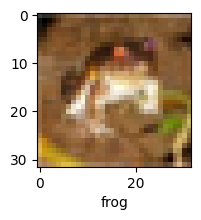

In [63]:
p_sample(X_train,y_train,0)

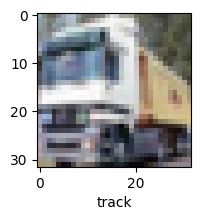

In [64]:
p_sample(X_train,y_train,1)

In [65]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
Ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
Ann.compile(optimizer='SGD', #Stochastic Gradient Descent
            loss='sparse_categorical_crossentropy', #The difference between Sparse_categorical_crossentropy(the values are of more then '1',i;e 5,6,8)
            #and categorical_crossentropy(The values exactly '1')
            metrics=['accuracy'])
Ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 135s 86ms/step - loss: 1.8150 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.6254 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.5446 - accuracy: 0.4536
Epoch 4/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.4851 - accuracy: 0.4749
Epoch 5/5
1563/1563 [==============================] - 137s 87ms/step - loss: 1.4332 - accuracy: 0.4955


In [ ]:
#Evaluating the test result
Ann.evaluate(X_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred=Ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

In [ ]:
#tf.keras.layers.LSTM
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)), #Convolutional Matrix
    layers.MaxPooling2D((2,2)), #Using Maxpooling in the Convolutional Matrix to reduce the size

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'), #Convolutional Matrix
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') #The difference between sigmoid(if the values are 1.0.34, 2.0.45 then it will be same in value)
    #and softmax(if the values are 1.0.34, 2.0.45 then it will be (0.34/0.34+0.45),(0.45/0.34+0.45))
])

In [ ]:
cnn.compile(optimizer='adam', #using the optimizer adam
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])



In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 41ms/step - loss: 1.4986 - accuracy: 0.4606
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1435 - accuracy: 0.5999
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0103 - accuracy: 0.6479
Epoch 4/10
 423/1563 [=======>......................] - ETA: 48s - loss: 0.9343 - accuracy: 0.6789

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_test=y_test.reshape(-1,) #Reshaping the array from 2D to !D
y_test[:5]

In [ ]:
p_sample(X_test,y_test,1) #Now testing the model

In [ ]:
y_pred=cnn.predict(X_test) #since we have seen that each array elemnts has value greater then 1,so by using the argmax() function
y_pred[:5]

In [ ]:
y_classes=[np.argmax(element) for element in y_pred] #Taking the maximum value from each of the array
y_classes[:5]

In [ ]:
y_test[:5] #it is making some error as our accuracy % is 68

In [ ]:
p_sample(X_test,y_test,0) #given Result

In [ ]:
classes[y_classes[1]] #Predicted result